In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *

On charge la base de donnée

In [2]:
X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='t10k-images-idx3-ubyte',
                         labels_path='t10k-labels-idx1-ubyte')
#On binarise les images
X_train = np.where(X_train > 126, 1, 0)
X_test = np.where(X_test > 126, 1, 0)
#On encode les targets
oh = OneHotEncoder()
y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [9]:
# Valeurs des hyper paramètres
vect_DNN = [784, 100, 50, 10] #taille du réseau DNN
n_iter_RBM = 100
n_iter_DBN = 200
lr = 0.01
batch_size = 32

In [ ]:
dnn = DNN(vect_DNN) #On initialise le DNN

dnn, losses = dnn.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM) #On entraine de manière
                                                                                        #non supervisée

dnn, loss = dnn.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr)  #On entraine ensuite de manière supervisée
plt.plot(loss)
plt.show()

dnn.test_dnn(X_test, y_test)

Epoch 1 out of 100, loss: 0.1380029137394859


In [16]:
dnn.get_pred(X_test[:5])

array([[0.11425521, 0.10678683, 0.09525383, 0.09645352, 0.09358291,
        0.08267874, 0.10589963, 0.11634611, 0.09970265, 0.08904058],
       [0.08278473, 0.11774999, 0.1228762 , 0.11914984, 0.06896959,
        0.04974381, 0.10116761, 0.10866419, 0.10565457, 0.12323948],
       [0.09161331, 0.10469213, 0.11637695, 0.12502633, 0.06293324,
        0.04935198, 0.1224791 , 0.10360228, 0.08806949, 0.13585521],
       [0.11410858, 0.10053584, 0.08569884, 0.08204931, 0.11580943,
        0.12323586, 0.08152348, 0.12496141, 0.112617  , 0.05946025],
       [0.0939731 , 0.10257197, 0.10134698, 0.12043303, 0.07389647,
        0.06077177, 0.11727499, 0.11817187, 0.10614523, 0.10541458]])

(<matplotlib.image.AxesImage at 0x7fce5d1c68b0>, 9)

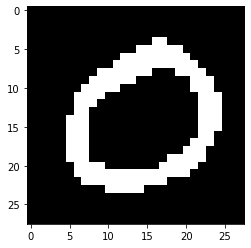

In [30]:
i=4
plt.imshow(X_train[i].reshape(28,28),cmap='gray'),np.argmax(y_train[i])

(<matplotlib.image.AxesImage at 0x7fce5d125850>, 0)

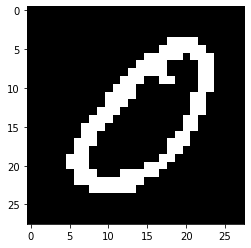

In [31]:
i=1
plt.imshow(X_train[i].reshape(28,28),cmap='gray'),np.argmax(y_train[i])

## Analyse

In [8]:
X_, y_ = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
#On split notre base de donnée
X_train = X_[:]
y_train = y_[:]
X_test = X_[10000:12000]
y_test = y_[10000:12000]
#On binarise les images
X_train = np.where(X_train > 126, 1, 0)
X_test = np.where(X_test > 126, 1, 0)
#On encode les targets
oh = OneHotEncoder()
y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()

200 200


In [10]:
#Figure 1
grid = [[784, 10], [784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
list_train = []
list_pretrain = []
for vect in grid:
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

199 2000
172 2000


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de couches")
plt.xlabel('Nombre de couches')
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [2, 3, 4, 5])
plt.plot(list_pretrain, [2, 3, 4, 5])
plt.grid()
plt.show()

In [ ]:
#Figure 2
grid = [[784, 50, 50, 10], [784, 100, 100, 10], [784, 200, 200, 10], [784, 300, 300, 10], 
        [784, 400, 400, 10], [784, 500, 500, 10], [784, 700, 700, 10]]
list_train = []
list_pretrain = []
for vect in grid:
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de neurones par couche")
plt.xlabel('Nombre de neurones')
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [50, 100, 200, 300, 400, 500, 700])
plt.plot(list_pretrain, [50, 100, 200, 300, 400, 500, 700])
plt.grid()
plt.show()

In [ ]:
#Figure 3: on choisit notre initialisation classique
grid = [1000, 3000, 7000, 10000, 30000, 60000]
list_train = []
list_pretrain = []
for limit in grid:
    #On split notre base de donnée
    X_train_ex = X_train[:limit]
    y_train_ex = y_train[:limit]

    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train_ex, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de données d'entrainement")
plt.xlabel("Nombre de données d'entrainement")
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [1000, 3000, 7000, 10000, 30000, 60000])
plt.plot(list_pretrain, [1000, 3000, 7000, 10000, 30000, 60000])
plt.grid()
plt.show()